In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_validate

In [2]:
# data = load_breast_cancer()
# x = data.data
# y = data.target

In [3]:
import pandas as pd
data = pd.read_csv('datasets/final1.csv')
del data['Unnamed: 0']
data.tail()

,ID,background_tissue,class,severity,x,y,rad,mean,var,std,min_pixel,max_pixel,min_coor_x,min_coor_y,max_coor_x,max_coor_y,bdips
307,mdb318,D,NORM,N,442,68,50,14.033015,0.505857,0.711236,11,35,436,951,467,965,0.000641
308,mdb319,D,NORM,N,590,281,50,145.912938,28.130725,5.303841,130,168,587,778,637,745,0.000114
309,mdb320,D,NORM,N,495,264,50,195.578840,470.810515,21.698168,146,227,451,745,527,722,0.000004
310,mdb321,D,NORM,N,604,271,50,177.764946,30.464061,5.519426,163,199,626,740,555,746,0.000026
311,mdb322,D,NORM,N,460,115,50,8.994009,7.767332,2.786993,6,24,493,895,446,863,0.000786


In [4]:
x = data.iloc[:,[7,8,9,11,16]]
y = data['severity']
di = {'N':0, 'B':1, 'M':2}
y = y.map(di)
x = x.drop([243])
y = y.drop([243])

In [5]:
max_list = [max(x.iloc[:,i]) for i in range(5)]
max_list

[235.7952171, 9077.427598999999, 95.27553516, 242, 0.955414013]

In [6]:
#Normalize data
for i in range(5):
    for j in range(len(x)):
        x.iloc[j,i] = x.iloc[j,i]/max_list[i]

In [7]:
x

,mean,var,std,max_pixel,bdips
0,0.639458,0.353129,0.594247,0.913223,0.000007
1,0.839164,0.084224,0.290214,0.946281,0.000058
2,0.634470,0.045081,0.212324,0.772727,0.000091
3,0.688844,0.008833,0.093983,0.747934,0.000605
4,0.781972,0.014001,0.118325,0.859504,0.000300
...,...,...,...,...,...
307,0.059514,0.000056,0.007465,0.144628,0.000670
308,0.618812,0.003099,0.055668,0.694215,0.000120
309,0.829444,0.051866,0.227741,0.938017,0.000004
310,0.753895,0.003356,0.057931,0.822314,0.000027


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state=42, stratify = y)

# KNN

In [53]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': np.arange(15)}
reg = KNeighborsClassifier()
model = GridSearchCV(reg, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

{'n_neighbors': 9}

In [54]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
print("Test set R^2: {:.2f}".format(knn.score(x_test, y_test)))
y_pred = knn.predict(x_test)
y_pred

Test set R^2: 0.62


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [55]:
np.array(y_test)

array([0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0],
      dtype=int64)

In [56]:
y_scores = knn.predict_proba(x_test)
fpr_knn, tpr_knn, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [57]:
scores = cross_validate(knn, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.00300598, 0.0019989 , 0.00195479, 0.00200057, 0.00199556]), 'score_time': array([0.00356793, 0.00502872, 0.00401926, 0.00597763, 0.00402641]), 'test_score': array([0.58730159, 0.56451613, 0.59677419, 0.53225806, 0.62903226]), 'train_score': array([0.66935484, 0.66666667, 0.68674699, 0.67871486, 0.67068273])}


# SVM


In [58]:
svm = sklearn.svm.SVC(C = 30, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=30)

In [59]:
svm.score(x_train, y_train)


0.6653225806451613

In [60]:
svm.score(x_test, y_test)


0.5714285714285714

In [61]:
y_pred = svm.predict(x_test)
y_pred == y_test

169     True
167     True
173     True
11     False
299     True
       ...  
63     False
269    False
250     True
311     True
221     True
Name: severity, Length: 63, dtype: bool

In [62]:
y_scores = svm.predict(x_test)
fpr_svm, tpr_svm, threshold = roc_curve(y_test, y_scores, pos_label= 1)
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [63]:
from sklearn.model_selection import cross_validate
scores = cross_validate(svm, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.0161221 , 0.00997353, 0.00698042, 0.00398874, 0.00396514]), 'score_time': array([0.00150919, 0.00299215, 0.00299335, 0.00199533, 0.00199556]), 'test_score': array([0.6031746 , 0.69354839, 0.58064516, 0.5       , 0.62903226]), 'train_score': array([0.66129032, 0.65060241, 0.64257028, 0.68674699, 0.65863454])}


# Decision Tree


In [9]:
from sklearn.tree import DecisionTreeClassifier


In [10]:
# tree=DecisionTreeClassifier(max_depth=2,random_state=42)
tree = DecisionTreeClassifier(random_state=42, max_depth=5)

In [11]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [12]:
y_pred = tree.predict(x_test)

In [13]:
print('Độ chính xác tập huấn luyện: {:.4f}'.format(tree.score(x_train, y_train)))
print('Độ chính xác tập kiểm tra: {:.4f}'.format(tree.score(x_test, y_test)))

Độ chính xác tập huấn luyện: 0.8185
Độ chính xác tập kiểm tra: 0.6667


In [14]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [15]:
print_score(tree, x_train, y_train, x_test, y_test, train=False)

Test Result:

accuracy score: 0.6667

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84        39
           1       0.45      0.71      0.56        14
           2       0.17      0.10      0.12        10

    accuracy                           0.67        63
   macro avg       0.50      0.54      0.51        63
weighted avg       0.68      0.67      0.66        63


Confusion Matrix: 
 [[31  5  3]
 [ 2 10  2]
 [ 2  7  1]]



In [16]:
y_scores = tree.predict_proba(x_test)
fpr_tree, tpr_tree, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_tree = auc(fpr_tree, tpr_tree)

In [17]:
scores = cross_validate(tree, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.00398946, 0.00199485, 0.00299239, 0.00300241, 0.00299144]), 'score_time': array([0.00099754, 0.00199389, 0.00099659, 0.00099158, 0.00199533]), 'test_score': array([0.58730159, 0.69354839, 0.61290323, 0.56451613, 0.70967742]), 'train_score': array([0.79032258, 0.81526104, 0.82329317, 0.82730924, 0.81124498])}


# Random forest


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [28]:
print_score(rf, x_train, y_train, x_test, y_test, train=True)
print('\n')
print_score(rf, x_train, y_train, x_test, y_test, train=False)

Train Result:

accuracy score: 0.8589

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       153
           1       0.97      0.63      0.76        54
           2       0.70      0.76      0.73        41

    accuracy                           0.86       248
   macro avg       0.85      0.78      0.80       248
weighted avg       0.87      0.86      0.85       248


Confusion Matrix: 
 [[148   0   5]
 [ 12  34   8]
 [  9   1  31]]

Average Accuracy: 	 0.6502
Accuracy SD: 		 0.0923


Test Result:

accuracy score: 0.7143

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        39
           1       0.53      0.57      0.55        14
           2       0.44      0.40      0.42        10

    accuracy                           0.71        63
   macro avg       0.61      0.61      0.61        63
weighted avg       0.71      0.71      0.71   

In [21]:
y_scores = rf.predict_proba(x_test)
fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [22]:
scores = cross_validate(rf, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.01355791, 0.01196742, 0.01599407, 0.0129602 , 0.01196504]), 'score_time': array([0.00250006, 0.00296569, 0.00199437, 0.00199437, 0.00299573]), 'test_score': array([0.65079365, 0.66129032, 0.66129032, 0.59677419, 0.72580645]), 'train_score': array([0.85483871, 0.81526104, 0.80722892, 0.84738956, 0.8313253 ])}


# Neural Network


In [37]:
# build model
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(5,)))
Dropout(0.25)
model.add(Dense(units=32, activation='relu'))
Dropout(0.25)
model.add(Dense(units=3, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 1,347
Trainable params: 1,347
Non-trainable params: 0
_________________________________________________________________


In [38]:
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42, stratify = y_train)

In [39]:
# y_train = keras.utils.to_categorical(y_train, 3)
# y_val = keras.utils.to_categorical(y_val, 3)
# y_test = keras.utils.to_categorical(y_test, 3)
# print('categorical y_train: ', y_train.shape)
# print('categorical y_val : ', y_val.shape)
# print('categorical y_test : ', y_test.shape)

In [40]:
from tensorflow.keras.optimizers import SGD
# Compile model
epochs = 100
lr = 0.001
# decay = lr/epochs
# sgd = SGD(lr=lr, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=lr), metrics=['accuracy'])

In [41]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=epochs,
                    verbose=True,
                    validation_data=(x_val, y_val))

Epoch 1/100
6/6 [==============================] - 1s 52ms/step - loss: 1.0920 - accuracy: 0.2125 - val_loss: 1.0846 - val_accuracy: 0.2742
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 1.0812 - accuracy: 0.2597 - val_loss: 1.0829 - val_accuracy: 0.2903
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 1.0800 - accuracy: 0.2563 - val_loss: 1.0812 - val_accuracy: 0.2903
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 1.0979 - accuracy: 0.2639 - val_loss: 1.0796 - val_accuracy: 0.3065
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 1.0802 - accuracy: 0.2835 - val_loss: 1.0779 - val_accuracy: 0.3226
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 1.0843 - accuracy: 0.2731 - val_loss: 1.0763 - val_accuracy: 0.3387
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 1.0758 - accuracy: 0.2538 - val_loss: 1.0747 - val_accuracy: 0.3387
Epoch 8/100
6/6 [===

In [42]:
# save model as json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model-norm3.h5")
print("Saved model to disk")

Saved model to disk


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


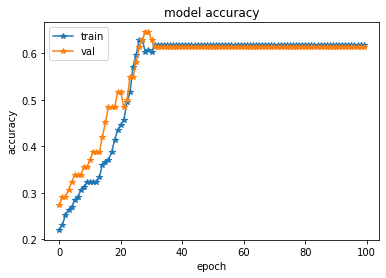

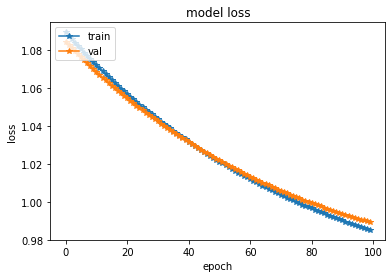

In [43]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], marker = "*")
plt.plot(history.history['val_accuracy'], marker = "*")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], marker = "*")
plt.plot(history.history['val_loss'], marker = "*")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
score = model.evaluate(x_test, y_test, verbose=True)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.9843 - accuracy: 0.6190
Test loss: 0.9842758774757385
Test accuracy: 0.6190476417541504


In [76]:
y_scores = model.predict(x_test)
fpr_nn, tpr_nn, threshold = roc_curve(y_test, y_scores, pos_label= 1)
roc_auc_nn = auc(fpr_nn, tpr_nn)

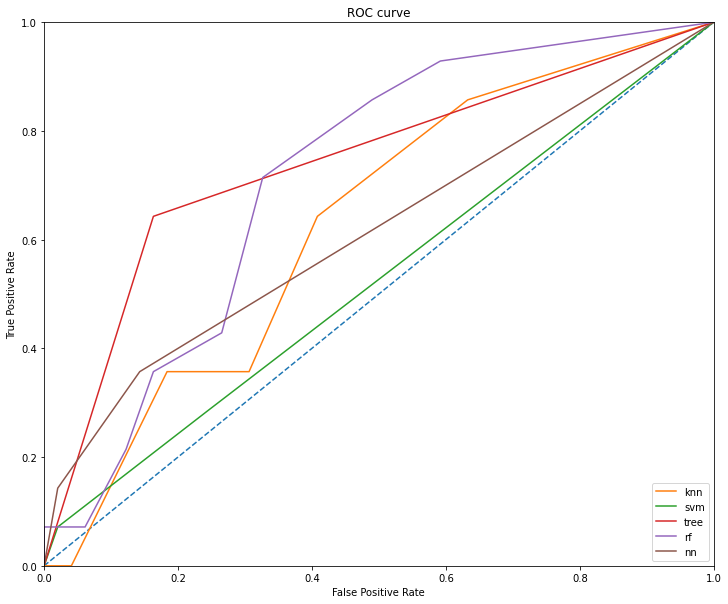

In [77]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
# 9.2 Also connect diagonals
ax.plot([0, 1], [0, 1], ls="--")   # Dashed diagonal line
# 9.3 Labels etc
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
# 9.4 Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# 9.5 Plot each graph now
ax.plot(fpr_knn, tpr_knn, label = "knn")
ax.plot(fpr_svm, tpr_svm, label = "svm")
ax.plot(fpr_tree, tpr_tree, label = "tree")
ax.plot(fpr_rf, tpr_rf, label = "rf")
ax.plot(fpr_nn, tpr_nn, label = "nn")

# 9.6 Set legend and show plot
ax.legend(loc="lower right")
plt.show()